<a href="https://colab.research.google.com/github/slvDev/Malaria-Detection-CNN-Keras/blob/master/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [0]:
zip_ref_train = zipfile.ZipFile("/content/drive/My Drive/cell-images-for-detecting-malaria.zip", 'r')
zip_ref_train.extractall("/content")
zip_ref_train.close()

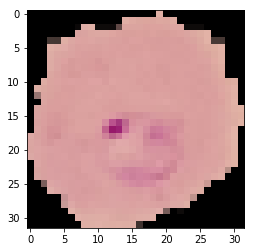

In [33]:
img_size = 32
dim = img_size, img_size
img_path = '/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dim)
plt.imshow(img)
plt.show()

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=90,
        #shear_range=0.25,
        #zoom_range=0.2,
        vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.2,
        )

train_generator = train_datagen.flow_from_directory(
        '/content/cell_images',  
        target_size=dim, 
        batch_size=32,
        #color_mode='grayscale',
        class_mode='binary',
        subset='training',
        )

valid_generator = train_datagen.flow_from_directory(
        '/content/cell_images',  
        target_size=dim, 
        batch_size=32,
        #color_mode='grayscale',
        class_mode='binary',
        subset='validation',
        )

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),    
    #tf.keras.layers.Dropout(0.3),
    
    #tf.keras.layers.Dense(256, activation='relu'),    
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
model.summary()

In [0]:
history = model.fit_generator(
        train_generator,
        epochs=20,
        validation_data=valid_generator,
        )

Epoch 1/20
689/689 [==============================] - 61s 89ms/step - loss: 0.3487 - acc: 0.8432 - val_loss: 0.2380 - val_acc: 0.9045
Epoch 2/20
689/689 [==============================] - 60s 88ms/step - loss: 0.1603 - acc: 0.9480 - val_loss: 0.1901 - val_acc: 0.9345
Epoch 3/20
689/689 [==============================] - 61s 89ms/step - loss: 0.1439 - acc: 0.9544 - val_loss: 0.2232 - val_acc: 0.9136
Epoch 4/20
689/689 [==============================] - 61s 89ms/step - loss: 0.1384 - acc: 0.9556 - val_loss: 0.1610 - val_acc: 0.9421
Epoch 5/20
689/689 [==============================] - 61s 88ms/step - loss: 0.1322 - acc: 0.9559 - val_loss: 0.1656 - val_acc: 0.9428
Epoch 6/20
689/689 [==============================] - 61s 89ms/step - loss: 0.1272 - acc: 0.9585 - val_loss: 0.1484 - val_acc: 0.9437
Epoch 7/20
689/689 [==============================] - 61s 88ms/step - loss: 0.1234 - acc: 0.9591 - val_loss: 0.1418 - val_acc: 0.9485
Epoch 8/20
689/689 [==============================] - 61s 88ms

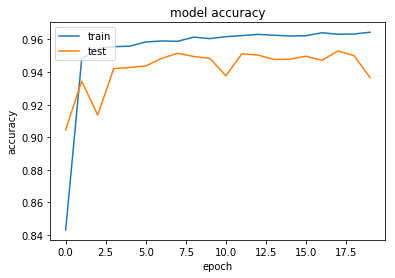

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

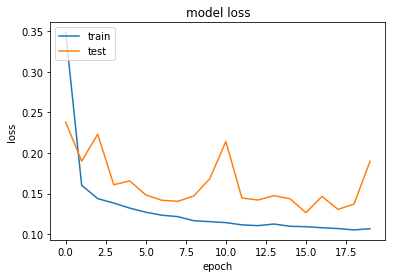

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()